In [2]:


from forex import *
from algos import * 
from oandapyV20.contrib.requests import MarketOrderRequest
from oandapyV20.endpoints.pricing import PricingStream
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
import os
import time
import random
from utils import *
from datetime import datetime
from algos import fify_fify

from matplotlib.pyplot import *
# import matplotlib.pyplot as plt


# Initialize the API client
env = ForexApi("AUD_USD")
# test_client = env.api
a = forex()

# env.update_history()
env.log_info(log_off=True)
start_time, settings = start(log_off=True)
print("\n")

# y,dy,ddy = algo_deriv(env,settings,start_time)





Note this may take a while
Updating...
Note this may take a while
Updating...
Started at 1735164973.0452





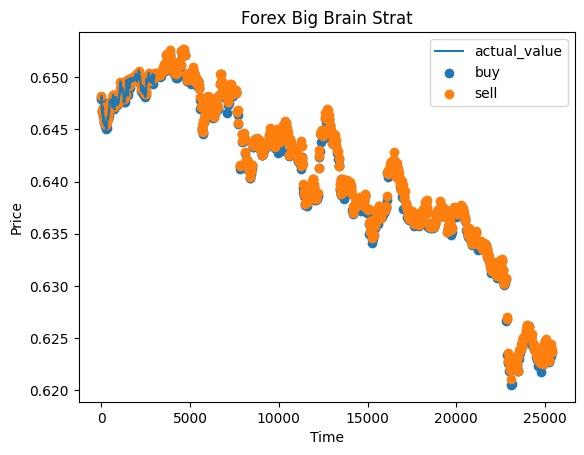

In [3]:

# env.log_info(log_off=True)
# start_time, settings = start(log_off=True)
# print("\n")

##### Start of Logic #####

y = env.history.min.iloc[1:,2].to_numpy(float)
y = smooth_ma(y)
dy = deriv(y)
ddy = deriv(deriv(y))
# plt.plot(y[50:100])
buy_arr = np.zeros(len(y)) 
sell_arr = np.zeros(len(y)) 

pos = -1 if ddy[0] <= 0 else 1
cpos = pos
tolerance = 0.02
tol = dy.mean() * tolerance

if pos < 0:
    buy_arr[0] = y[0]
else:
    sell_arr[0] = y[0]

count = 0 
for i in range(1,len(y)):
    # if local min/max (ddy[i] == 0)
    # buy/sell
    if abs(ddy[i] - dy[i]) < 1e-3:
        
        if dy[i-1] > 0:
            cpos = 1
        else:
            cpos = -1
            

    if cpos != pos:
        if cpos < 0:
            sell_arr[i] = y[i]
        else:
            
            buy_arr[i] = y[i]
        pos = cpos


nbuy = np.array([])
nsell = np.array([])
tbuy = np.array([])
tsell = np.array([])

for i in range(len(buy_arr)):
    if buy_arr[i] >= 0.1:
        nbuy = np.append(nbuy, buy_arr[i])
        tbuy = np.append(tbuy, i)
    
    if sell_arr[i] >= 0.1:
        nsell = np.append(nsell, sell_arr[i])
        tsell = np.append(tsell, i)



s = 0
e = 1000
# y = y[s:e]

t = np.arange(s,e)
buy_arr = buy_arr[s:e]
sell_arr = sell_arr[s:e]
tbuy = tbuy[s:e]
tsell = tsell[s:e]
nbuy = nbuy[s:e]
nsell = nsell[s:e]

ys = 0
ye = 3000

plt.title("Forex Big Brain Strat")
plt.plot(np.arange(ys,ye),y[ys:ye], label='actual_value')
plt.scatter(tbuy, nbuy, label='buy')
plt.scatter(tsell, nsell, label='sell')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()



##### End of Logic #####

# env.close_all()
# end(start_time, log_off=True)
# if abs(ddy[-1]) > (0 + abs(ddy.max()) * 0.2):

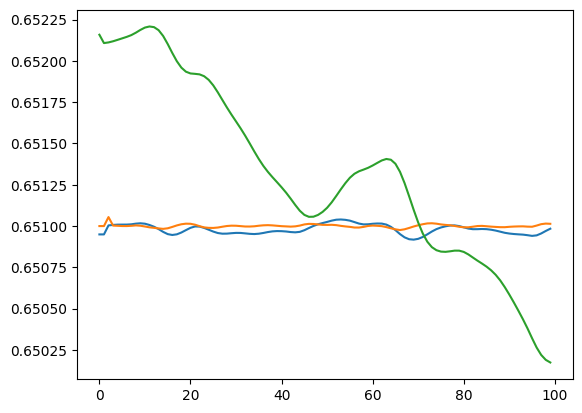

In [81]:
plt.plot(dy[:100] + 0.651)
plt.plot(ddy[:100] + 0.651)
plt.plot(y[:100])

In [ ]:



y = arr
# plt.plot(arr) # truth

narr = np.zeros((len(arr),len(arr)))
darr = deriv(arr).reshape(len(arr),1)




NameError: name 'arr' is not defined

In [ ]:

sline = sl
mline = ml

plt_amt = 5

fig = plt.figure(figsize=(10,7))


fig.add_subplot(2,2,1)
plot(ld[-plt_amt:],label="Long")
plot(sd[-plt_amt:],label="Short")
title("EMA")
legend()

fig.add_subplot(2,2,2)
plot(deriv(ld)[-plt_amt:], label="Long")
plot(deriv(sd)[-plt_amt:], label="Short")
title("Deriv EMA")
legend()

fig.add_subplot(2,2,3)
plot(sline[-plt_amt:],label="Sline")
plot(mline[-plt_amt:],label="Mline")
title("MACD")
legend()

fig.add_subplot(2,2,4)
plot(deriv(sline)[-plt_amt:],label="Sline")
plot(deriv(mline)[-plt_amt:],label="Mline")
title("Deriv MACD")
legend()




NameError: name 'sl' is not defined

In [ ]:
cm = sm - lm

# We are looking for short
# c = s - l




a = """
x = s
dx = deriv(s)

position buy/sell


if sum(dx) > 0 and buy:
    hold
    
elif sum dx is neg and pos :
    sell



"""


s = sum(deriv(ld[20:]))

pos = 1

if (s >= 0 and pos == 1) or (s < 0 and pos == -1):
    "hold"
elif (s >= 0 and pos != 1) or (s < 0 and pos != -1):
    "close"
    # switch
    # buy/sell

# plot(deriv(ld[20:]),'g',label="Longd")

# # plot(deriv(sd),'r',label="Short")

# figure(2)
# plot(ld[20:],'g')
# plot(sd[20:],'r')

0.005926541390719908


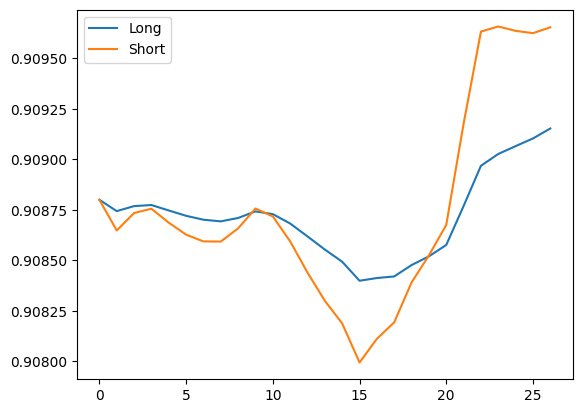

In [ ]:
from matplotlib.pyplot import plot, legend
from forex import forex
f = forex("EURUSD")

plot(lh,label="Long")
plot(sh,label="Short")
legend()




# Forex


In [ ]:
fenv = forex()

arr = fenv.min["Close"].to_numpy()

# l,s,c = calculate_ema_cross(arr)
l,s,c = calculate_macd(arr)
c[c<=0] = -1
c[c>0] = 1

observ_space = np.vstack((arr,l,s))



# RL part

In [ ]:
import gym
from gym import spaces
import numpy as np
from ray.rllib.env import MultiAgentEnv
import yaml

class CustomEnvironment(MultiAgentEnv):
    def __init__(self, config="RL_config.yaml"):
        
        settings = yaml.load(open(config),Loader=yaml.SafeLoader)

        fenv = forex()
        arr = fenv.min["Close"].to_numpy()
        l,s,c = calculate_macd(arr)
        c[c<=0] = -1
        c[c>0] = 1

        observ_space = np.vstack((arr,l,s))
        
        # Define your environment's parameters and configurations here
        self.observation_space = spaces.Box(low=0, high=1, shape=(...,))
        self.action_space = spaces.Discrete(...)
        # Initialize any other variables or components needed

    def reset(self):
        # Reset the environment to its initial state and return the initial observation
        return np.zeros(...)

    def step(self, action):
        # Take a step in the environment based on the given action
        # Calculate the next state, reward, done flag, and info dictionary
        next_observation = np.zeros(...)
        reward = 0
        done = False
        info = {}
        return next_observation, reward, done, info

    def render(self, mode='human'):
        # Render the environment for visualization (optional)
        pass

    def close(self):
        # Clean up resources or do any necessary cleanup (optional)
        pass


In [ ]:
import yaml




{'test': 1}

# ML part

Idea
* Get the model to recognize inflection points and act accordingly


In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(27,50),
    nn.ReLU(),
    nn.Linear(50,50),
    nn.ReLU(),
    nn.Linear(50,1)
)


Sequential(
  (0): Linear(in_features=27, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=5, bias=True)
)

In [ ]:
# from ray.rllib.algorithms.ppo import PPOConfig
# from ray.tune.logger import pretty_print


# algo = (
#     PPOConfig()
#     .env_runners(num_env_runners=1)
#     .resources(num_gpus=0)
#     .environment(env="CartPole-v1")
#     .build()
# )

# print("training")
# for i in range(10):
#     print(i)
#     result = algo.train()
#     print(pretty_print(result))

#     if i % 5 == 0:
#         checkpoint_dir = algo.save().checkpoint.path
#         print(f"Checkpoint saved in directory {checkpoint_dir}")

